# 实验2: 数据预处理

数据预处理，也称数据清洗，它是在我们开始分析数据和建模前，对获得数据中可能存在的问题进行排查和解决的过程。它主要包括对于数据中存在的重复问题，缺失问题，以及奇异值（outliers）等进行剔除、填补和修正等方法。

## 1. 数据去重




由于各种原因，数据集会藏有重复的行。比如【datasets】文件夹中数据集【sample_data01.csv】，双击观察。

In [1]:
import pandas as pd
data = pd.read_csv("datasets/sample_data01.csv")
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


首先检查哪些行有重复值

In [2]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

然后对数据集中重复的行，进行去重操作。

In [3]:
data = data.drop_duplicates()   # data.drop_duplicates(inplace=True)
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


你也可以指定对只某一列进行去重操作。

In [4]:
data = data.drop_duplicates(["k1"])
data

,k1,k2
0,one,1
1,two,1


## 2. 缺失值填补





数据中存在缺失值的原因来自很多方面，比如采集过程中遗漏的，或者是数据传输过程中丢失的等。我们使用pandas来处理缺失值，pandas使用浮点值NaN（Not a Number来表示缺失值）。

In [5]:
import pandas as pd
data = pd.read_csv('datasets/sample_data02.csv')
data

,0,1,2
0,0.603428,0.618716,1.666553
1,-0.025586,-1.390777,0.948549
2,0.223448,1.014128,NaN
3,-1.234958,-0.427789,NaN
4,-0.421035,NaN,NaN
5,0.809019,NaN,NaN
6,-0.220916,NaN,NaN


pandas提供了识别缺失值的方法isnull，以及识别非缺失值的方法notnull，这两种方法使用后返回布尔值True和False。

In [6]:
data.isnull()

,0,1,2
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,True
4,False,True,True
5,False,True,True
6,False,True,True


能看到`is.null`的方法可以显示对应缺失值位置为True，意思是这个位置为缺失。

这里我们在尾部加上`any()`就可以按照列的方向，观察是否有缺失值。

In [7]:
data.isnull().any()

0    False
1     True
2     True
dtype: bool

结合sum函数和isnull、notnull函数，可以检测数据中缺失值的分布，以及数据中一共含有多少缺失值。

### 2.1 删除缺失值

删除缺失值使用pd.DataFrame.dropna方法：
```python
pd.DataFrame.dropna(
    axis: 'Axis' = 0,
    how: 'str' = 'any',
    thresh=None,
    subset=None,
    inplace: 'bool' = False,
)
```

#### dropna(axis=0) 删除有缺失值的行

In [8]:
print('采用dropna前, 数据框大小（行，列）=', data.shape)
droped_data = data.dropna()
print('采用dropna后, 数据框大小（行，列）=', droped_data.shape)

采用dropna前, 数据框大小（行，列）= (7, 3)
采用dropna后, 数据框大小（行，列）= (2, 3)


appiness_data.dropna部分存在缺失的行，也就是样本被删除掉了。

#### dropna(axis=1) 删除有缺失值的列

In [9]:
print('采用dropna前, 数据框大小（行，列）=', data.shape)
droped_data = data.dropna(axis=1)
print('采用dropna后, 数据框大小（行，列）=', droped_data.shape)

采用dropna前, 数据框大小（行，列）= (7, 3)
采用dropna后, 数据框大小（行，列）= (7, 1)


### 2.2 填充缺失值

#### A. 使用一个常数来替代缺失值

在现实的案例分析中，数据往往是很宝贵的，仅仅因为某一个行或列存在一个缺失值，就删除整行或整列，并不可取。这时，我们需要考虑使用`fillna`方法来补全缺失值。

In [10]:
data.fillna(0)

,0,1,2
0,0.603428,0.618716,1.666553
1,-0.025586,-1.390777,0.948549
2,0.223448,1.014128,0.000000
3,-1.234958,-0.427789,0.000000
4,-0.421035,0.000000,0.000000
5,0.809019,0.000000,0.000000
6,-0.220916,0.000000,0.000000


#### B. 为不同列设定不同的填充值

在调用fillna时使用字典，你可以为不同列设定不同的填充值：

In [11]:
data.fillna({"1":0.5, "2":0})

,0,1,2
0,0.603428,0.618716,1.666553
1,-0.025586,-1.390777,0.948549
2,0.223448,1.014128,0.000000
3,-1.234958,-0.427789,0.000000
4,-0.421035,0.500000,0.000000
5,0.809019,0.500000,0.000000
6,-0.220916,0.500000,0.000000


#### C. ffill填充

对于很多时间序列数据，也就是样本按照日期进行排序的数据集。出现缺失值的时候，很自然的想到用往期的值，比如前一日，或者上一年的数据，对于下一日或下一年的缺失位置，进行填充。

In [12]:
data.fillna(method='ffill')

,0,1,2
0,0.603428,0.618716,1.666553
1,-0.025586,-1.390777,0.948549
2,0.223448,1.014128,0.948549
3,-1.234958,-0.427789,0.948549
4,-0.421035,-0.427789,0.948549
5,0.809019,-0.427789,0.948549
6,-0.220916,-0.427789,0.948549


#### D. 平均值填充

现实中，对于采集的数据来说，每一列都符合某种统计分布，也就是说，都有其内在的统计属性，包括平均值。如果能用平均值来填充缺失的位置，会更符合统计学的意义。

In [13]:
data.mean()

0   -0.038086
1   -0.046431
2    1.307551
dtype: float64

`mean`计算出来的数据集均值，是按照每一列给出的。

In [14]:
data.fillna(data.mean())

,0,1,2
0,0.603428,0.618716,1.666553
1,-0.025586,-1.390777,0.948549
2,0.223448,1.014128,1.307551
3,-1.234958,-0.427789,1.307551
4,-0.421035,-0.046431,1.307551
5,0.809019,-0.046431,1.307551
6,-0.220916,-0.046431,1.307551


仔细观察我们之前缺失的位置，中间和右边两列，就会发现，被填充成了0.302509和0.417197这两个平均值。

## 3. 异常值修正




异常值，英文叫Outliers，也可以称之为离群值或奇异值，意思是存在和数据集其他数据明显不同的点。

In [15]:
data = pd.read_csv("datasets/sample_data03.csv")
data

,0,1,2,3
0,-0.018531,0.015016,-0.078879,0.438331
1,3.028278,0.221342,1.457485,-0.382610
2,0.046139,0.801093,-0.558427,-0.219651
3,-0.158183,-1.161704,0.608872,0.525678
4,0.345622,-0.162977,1.900662,1.311755
...,...,...,...,...
995,-1.418074,3.126785,0.303615,-1.363894
996,0.132039,-0.739629,1.473865,-0.003347
997,1.439217,-0.488119,-1.911639,1.253696
998,0.406892,-0.255069,0.898582,-1.083567


### 3.1 设置一个阈值，不能超过阈值

假设我们想找出列名为“2”，这一列大于2.5的值

In [16]:
col = data["2"]
col[col>2.5]

502    2.584954
544    2.530649
553    2.563760
558    2.616420
672    2.532030
796    2.550268
967    2.788374
Name: 2, dtype: float64

In [17]:
col[col>2.5] = 2.5

将所有超过2.5的值，都赋值成2.5

In [18]:
col.describe()

count    1000.000000
mean       -0.008935
std         1.009186
min        -3.387148
25%        -0.647464
50%        -0.017110
75%         0.677215
max         2.500000
Name: 2, dtype: float64

我们能看到col的最大值是2.5，超过2.5值的原始值都被重新赋值成了2.5。

### 3.2 置信区间以外的异常值

有的时候，我们可以使用统计学里置信区间的概念。

|数值分布|在数据中的占比|
|---|---|
| ($\mu - \sigma,$ $\mu + \sigma$) |0.6827|
| ($\mu -2 \sigma,$ $\mu + \sigma$) |0.9545|
| ($\mu -3 \sigma,$  $\mu + \sigma$) |0.9973|


3倍标准差被称为拉依达法则。该法则先假设一组检测数据只含有随机误差，对原始数据得到标准差，认为超过3倍标准差即为异常值。这里以超过均值加三倍标准差，被替换成均值为例。

In [19]:
data > data.mean() + 3*data.std()

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,True,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


超过均值$+$3倍标准差的值，变成nan值，也就是替换成缺失值。

In [20]:
import numpy as np
data[data > data.mean() + 3*data.std()]=np.nan

再将缺失值，替换成每一列的均值。

In [21]:
data = data.fillna(data.mean())

到这里，就替换完成了。

### 3.3 箱形图识别异常值

箱形图如下：

![箱形图](image/箱形图.png)

异常值被定义为小于QL-1.5IQR或大于QU+1.5IQR的值：
- QL称为下四分位数
- QU称为上四分位数
- IQR称为四分位区间，也即是上四分位数和下四分位数之差。
- 上限：QU+1.5IQR
- 下限：QL-1.5IQR

<AxesSubplot:>

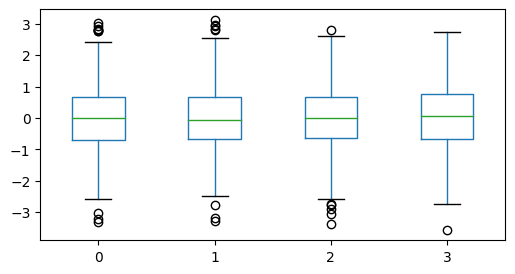

In [22]:
data = pd.read_csv("datasets/sample_data03.csv")
data.boxplot(grid=False, figsize=(6,3))

<AxesSubplot:>

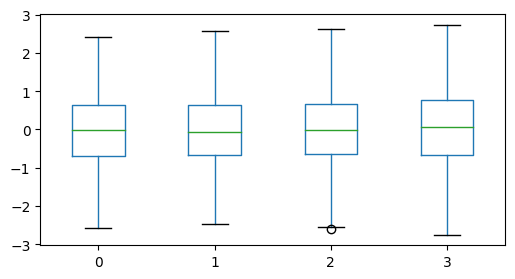

In [23]:
import numpy as np
QU = data.quantile(0.75)
QL = data.quantile(0.25)
IQR = QU - QL
data[(data>=(QU + 1.5*IQR)) | (data<=(QL-1.5*IQR))] = np.nan
data = data.fillna(data.quantile(0.5))
data.boxplot(grid=False, figsize=(6,3))

## 4. 归一化(标准化)数据
归一化(标准化)是一种数据预处理技术，用于将不同特征之间的数值范围标准化，以消除不同特征之间的量纲差异。常用的归一化(标准化)方法有如下几种：

### 4.1 最小最大标准化

最小最大标准化（Min-Max Normalization）是一种常用的数据标准化方法，用于将数据缩放到指定的范围内。
该方法通过对数据进行线性变换，使其值域被缩放到指定的范围内，通常是 [0,1] 或 [-1,1]。

该方法的公式如下：

$$
X_{norm} = (X - X_{min}) / (X_{max} - X_{min})
$$

通过最小最大标准化，保留原始数据之间的数值顺序，可以使得不同量纲的数据在同一标度下进行比较，且可以使得数据具有可比性。

In [24]:
def min_max_scaler(x):
    return (x-x.min())/(x.max()-x.min())

### 4.2 均值标准差标准化
Z-score 标准化（Z-score normalization）：将数据转换为均值为 0、标准差为 1 的分布。具体公式:

$$
X^{'} = \frac{X-\bar{X}}{\sigma_X}
$$
$
其中\bar{X}为X的均值，\sigma_X为X的标准差$

假设数据总体分布符合正态分布，对数据样本进行均值标准差标准化后，使符合均值为0，方差为1的标准正态分布。均值标准差标准化也称Z-score方法。

In [25]:
def stand_scaler(x):
    """
    对x进行均值标准差标准化，并返回标准化后的结果
    输入参数x为pandas.DataFrame类型
    """
    return (x-x.mean())/x.std()

### 4.3 小数定标标准化

小数定标规范化（Decimal Scaling Normalization）：将数据除以一个固定的基数，通常是 10 的幂次方。具体公式为:
$$
X^{'} = \frac{X}{10^k}
$$
其中 X 表示原始数据，k 表示一个固定的幂次方。
移动小数点的位置取决于一组数中最大绝对值的位数。

比如：

[100,2,30] 标准化为[0.1,0.002,0.03]

[2,30,10]标准化为[0.02,0.3,0.1]



In [26]:
import numpy as np
def decimal_scaler(x):
    k = int(np.log10(np.max(x)))
    return x/10**(k)

decimal_scaler(np.array([100,2,10]))

array([1.  , 0.02, 0.1 ])

总之，归一化方法的选择需要根据具体情况而定，通常需要考虑数据的分布情况、数据范围和算法的特点等因素。在实际应用中，可以尝试多种归一化方法，并比较它们在算法性能和准确性方面的表现，以选择最适合的方法。

## 5. 哑变量处理

哑变量处理，也叫One-hot编码。数据分析的绝大多数模型都要求输入的特征为数值型，而非字符型等，所以这些特征需要经过哑变量处理才可以放入模型中。哑变量处理的原理如下：

<center><img src="image/yabianliang1.png" alt="image/yabianliang1.png" width="600" height="228"></center>


下面，利用pandas库中的get_dummies函数对类别型特征进行哑变量处理
```python
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
```
<center><img src="image/yabianliang2.png" alt="image/yabianliang2.png" width="700" height="228"></center>



对于一个类别型特征，若其取值有m个，则经过哑变量处理后就变成了m个二元特征，并且这些特征互斥，每次只有一个激活，这使得数据变得稀疏。
对类别型特征进行哑变量处理主要解决了部分算法模型无法处理类别型数据的问题，这在一定程度上起到了扩充特征的作用。由于数据变成了稀疏矩阵的形式，因此也加速了算法模型的运算速度。


以JD平台的巧克力商品为例，使用爬虫软件爬取的数据在路径`datasets/Chocolate.csv`。

In [27]:
import pandas as pd
df = pd.read_csv('datasets/Chocolate.csv')
df.head(5)

,价格,商品名称,评价数
0,30.9,德芙Dove丝滑牛奶巧克力分享碗装 252g 代言人同款 休闲零食婚庆糖果礼品（新旧包装随机发放）,5000000
1,30.9,德芙Dove香浓黑巧克力分享碗装 252g 代言人同款办可可脂公室零食婚庆喜糖(新旧包装随机发放),5000000
2,139.9,费列罗(FERRERO)榛果威化糖果巧克力制品 婚庆喜糖零食伴手礼 节日礼物员工福利 48粒...,2000000
3,399.0,歌帝梵GODIVA比利时进口夹心巧克力金装25枚万圣节礼物送儿童女友女朋友男朋友生日礼物情人...,20000
4,41.9,德芙 Dove分享碗装66%可可脂醇黑巧克力 252g 代言人同款糖果巧克力 休闲零食婚庆喜糖,5000000


In [28]:
# 将以下代码封装成函数
def func(data, key_word):
    result = []
    for i in data['商品名称']:
        if key_word in i:
            result.append(1)
        else:
            result.append(0)
    return result

In [29]:
data = df[['价格', '评价数']]

In [30]:
data['德芙'] = func(df, '德芙')
data['好时'] = func(df, '好时')
data['费列罗'] = func(df, '费列罗')
data['Meiji'] = func(df, 'Meiji')
data['歌帝梵'] = func(df, '歌帝梵')
data['牛奶巧克力'] = func(df, '牛奶巧克力')
data['夹心巧克力'] = func(df, '夹心巧克力')
data['黑巧克力'] = func(df, '黑巧克力')
data['榛果'] = func(df, '榛果')

In [31]:
data.head(5)

,价格,评价数,德芙,好时,费列罗,Meiji,歌帝梵,牛奶巧克力,夹心巧克力,黑巧克力,榛果
0,30.9,5000000,1,0,0,0,0,1,0,0,0
1,30.9,5000000,1,0,0,0,0,0,0,1,0
2,139.9,2000000,0,0,1,0,0,0,0,0,1
3,399.0,20000,0,0,0,0,1,0,1,0,0
4,41.9,5000000,1,0,0,0,0,0,0,1,0


## 实验2.1 数据预处理

对上述爬取的数据进行预处理：
1. 检查是否有重复样本(行)，如果有，去重
2. 检查是否有缺失值，如果有，填补缺失值
3. 检查是否有异常值，如果有，修正异常值或者删除样本（行）
4. 对于数据集进行哑变量处理，即根据商品信息，将品牌、类别等信息从商品名称中提取出来，使用0和1表示这些特征。
5. 附加题：将采集的评价数从字符串改成数值。